# Exploratory data analysis of the crowd feasibility ratings

# 0. Import dependencies and inputs

In [1]:
%run ../notebook_preamble_Transitions.ipy
from scipy.stats import pearsonr, spearmanr

# Validation data of the first batch
batch_1 = pd.read_csv(data_folder + 'processed/validation/Transitions_to_validate_BATCH_1.csv')
batch_2 = pd.read_csv(data_folder + 'processed/validation/Transitions_to_validate_BATCH_2.csv')
batch = pd.concat([batch_1, batch_2], axis=0)

# Crowd feasibility ratings
path_to_val_data_1 = data_folder + 'restricted/validation/nesta_output_16Dec.csv'
path_to_val_data_2 = data_folder + 'restricted/validation/nesta_output_4_Jan_2021.csv'
batch_results = pd.concat([pd.read_csv(path_to_val_data_1), pd.read_csv(path_to_val_data_2)], axis=0)

# Occupation similarity matrices
sims = load_data.Similarities()


In [2]:
batch_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70359 entries, 0 to 32024
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   classification_id                 70359 non-null  int64 
 1   subject_ids                       70359 non-null  int64 
 2   origin_id                         70359 non-null  int64 
 3   origin_label                      70359 non-null  object
 4   origin_description                70359 non-null  object
 5   destination_id                    70359 non-null  int64 
 6   destination_label                 70359 non-null  object
 7   destination_description           70359 non-null  object
 8   perfectly_matched_skills          59402 non-null  object
 9   partially_matched_skills          53095 non-null  object
 10  unmatched_skills                  69501 non-null  object
 11  familiarity_with_origin_1-5       70359 non-null  int64 
 12  familiarity_with_d

In [3]:
batch_results

,classification_id,subject_ids,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,...,feasibility_1-5,Reasons,coder_id,questionable_respondant_flag,year_of_birth,gender,background,highest_qualification,nation,time_stamp
0,289643147,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,3,**Qualifications** - different qualification r...,566802cf6d9c32c4b9d6,False,1994,Male,"['Education','Healthcare']",Master'degree,England,NaN
1,289715915,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,3,"**Skills** - poor skills overlap, missing esse...",dfaa44417fdef5173766,False,1967,Female,"['Healthcare', 'Sales and services']",Bachelor's degree,Scotland,NaN
2,289776880,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,"**Skills** - poor skills overlap, missing esse...",b929c3beb0e7ffb1ea4a,False,1984,Male,"['Education','Engineering and research']",Doctorate,England,NaN
3,289806895,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,1,**Qualifications** - different qualification r...,20df3373ab16becb8f2e,False,1987,Male,['Sales and services'],GCSE,Wales,NaN
4,290219173,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,**Qualifications** - different qualification r...,ef345455b53500fbb303,False,1986,Female,"['Business and administration', 'Public sector...",Bachelor's degree,England,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32020,297895349,53142702,2691,animal osteopath,Animal osteopaths provide a therapeutic treat...,1105,animal physiotherapist,Animal physiotherapists provide a therapeutic ...,advise on animal welfare; animal behaviour; an...,NaN,...,5,"**Skills** - poor skills overlap, missing esse...",a33630934d5122edc8cb,False,1996,Male,['Other'],Master's degree,England,2020-12-29 15:50:57+00:00
32021,298101417,53142702,2691,animal osteopath,Animal osteopaths provide a therapeutic treat...,1105,animal physiotherapist,Animal physiotherapists provide a therapeutic ...,advise on animal welfare; animal behaviour; an...,NaN,...,4,"**Skills** - poor skills overlap, missing esse...",9fa97ce4c309a3033415,False,1990,Male,"['Construction, transport and security']",GCSE,England,2020-12-30 13:27:39+00:00
32022,298125548,53142702,2691,animal osteopath,Animal osteopaths provide a therapeutic treat...,1105,animal physiotherapist,Animal physiotherapists provide a therapeutic ...,advise on animal welfare; animal behaviour; an...,NaN,...,1,"**Skills** - poor skills overlap, missing esse...",b929c3beb0e7ffb1ea4a,False,1984,Male,"['Education','Engineering and research']",Doctorate,England,2020-12-30 16:09:39+00:00
32023,298125814,53142702,2691,animal osteopath,Animal osteopaths provide a therapeutic treat...,1105,animal physiotherapist,Animal physiotherapists provi

# 1. Check the validations results dataset

## 1.1 Simple checks

In [10]:
batch_results.head()

,classification_id,subject_ids,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,...,feasibility_1-5,Reasons,coder_id,questionable_respondant_flag,year_of_birth,gender,background,highest_qualification,nation,time_stamp
0,289643147,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,3,**Qualifications** - different qualification r...,566802cf6d9c32c4b9d6,False,1994,Male,"['Education','Healthcare']",Master'degree,England,NaN
1,289715915,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,3,"**Skills** - poor skills overlap, missing esse...",dfaa44417fdef5173766,False,1967,Female,"['Healthcare', 'Sales and services']",Bachelor's degree,Scotland,NaN
2,289776880,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,"**Skills** - poor skills overlap, missing esse...",b929c3beb0e7ffb1ea4a,False,1984,Male,"['Education','Engineering and research']",Doctorate,England,NaN
3,289806895,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,1,**Qualifications** - different qualification r...,20df3373ab16becb8f2e,False,1987,Male,['Sales and services'],GCSE,Wales,NaN
4,290219173,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,**Qualifications** - different qualification r...,ef345455b53500fbb303,False,1986,Female,"['Business and administration', 'Public sector...",Bachelor's degree,England,NaN


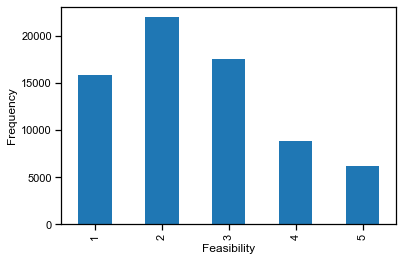

In [12]:
fig, ax = plt.subplots()

batch_results.groupby('feasibility_1-5').agg({'classification_id': 'count'}).plot.bar(ax=ax, legend=None)
ax.set_xlabel('Feasibility')
ax.set_ylabel('Frequency');

The distribution of feasiability ratings appears to follow a skewed normal distribution with a mean of 2.37.

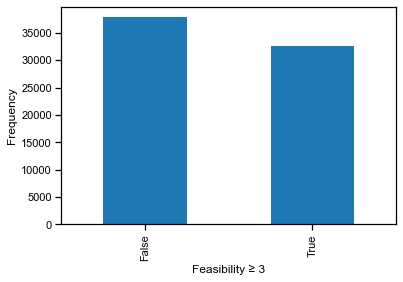

In [13]:
fig, ax = plt.subplots()

(batch_results['feasibility_1-5'] > 2).value_counts().plot.bar()
ax.set_xlabel('Feasibility ≥ 3')
ax.set_ylabel('Frequency');

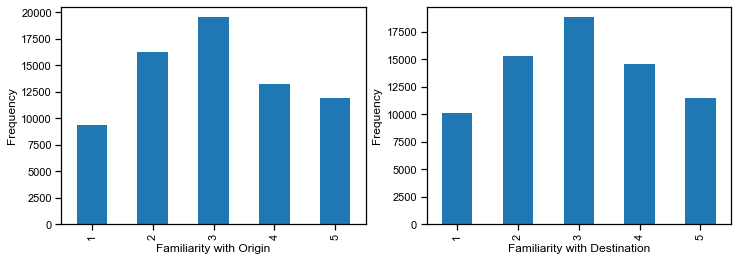

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

batch_results.groupby('familiarity_with_origin_1-5').agg({'classification_id': 'count'}).plot.bar(ax=axs[0], legend=None)
axs[0].set_xlabel('Familiarity with Origin')
axs[0].set_ylabel('Frequency')
batch_results.groupby('familiarity_with_destination_1-5').agg({'classification_id': 'count'}).plot.bar(ax=axs[1], legend=None)
axs[1].set_xlabel('Familiarity with Destination')
axs[1].set_ylabel('Frequency');

The distribution of familiarity for both the origin and destination jobs.

## 1.2 Feasibility and Familiarity

In [15]:
feasibility_familiarity = batch_results[
    ['feasibility_1-5', 'familiarity_with_origin_1-5', 'familiarity_with_destination_1-5']].corr(method='pearson')

feasibility_familiarity

,feasibility_1-5,familiarity_with_origin_1-5,familiarity_with_destination_1-5
feasibility_1-5,1.000000,0.225720,0.221305
familiarity_with_origin_1-5,0.225720,1.000000,0.750772
familiarity_with_destination_1-5,0.221305,0.750772,1.000000


In [16]:
feasibility_familiarity = batch_results[
    ['feasibility_1-5', 'familiarity_with_origin_1-5', 'familiarity_with_destination_1-5']].corr(method='spearman')

feasibility_familiarity

,feasibility_1-5,familiarity_with_origin_1-5,familiarity_with_destination_1-5
feasibility_1-5,1.000000,0.196113,0.190401
familiarity_with_origin_1-5,0.196113,1.000000,0.743249
familiarity_with_destination_1-5,0.190401,0.743249,1.000000


The familiarity with the origin and destination occupations are correlated showing that coders generally had a similar level of familiartiy with both occupations when judging a transition. This familiarity does not seem to correlate strongly with the feasibility rating.

In [17]:
batch_results['familiarity_diff'] = (batch_results['familiarity_with_origin_1-5']
                                     - batch_results['familiarity_with_destination_1-5'])
batch_results['familiarity_total'] = (batch_results['familiarity_with_origin_1-5']
                                     + batch_results['familiarity_with_destination_1-5'])

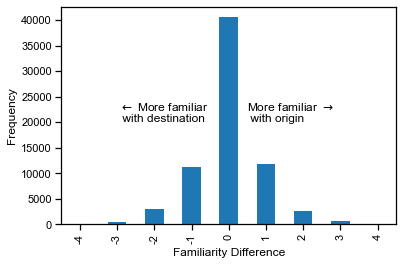

In [18]:
fig, ax = plt.subplots()

(batch_results['familiarity_diff']
 .value_counts().sort_index()
 .plot.bar(ax=ax))

ax.text(1.05, 20000, '$\leftarrow$ More familiar \n with destination')
ax.text(4.5, 20000, 'More familiar ' + r'$\rightarrow$'+ '\n with origin')
ax.set_xlabel('Familiarity Difference')
ax.set_ylabel('Frequency');

In over 20,000 cases, coders responded by saying that they had equal familiarity with the origin and destination occupations. In less than 15,000 cases, the absolute difference in familiarity was 1. It is very uncommon to find absolute differences of 2 or more.

The distribution of differences in familiarity is highly symmetric, indicating that coders found destinations that they were more familiar with as often as they found origin occupations that they were more familiar with. 

This all raises further questions:

- Do transitions with more familiar occupations have more consistent feasibility ratings between coders?
- Does the difference in familiarity affect the feasibilty rating?

More familiar with the origin:

In [19]:
batch_results.sort_values('familiarity_diff')[['origin_label', 'destination_label']].tail(10)

,origin_label,destination_label
26343,midwife,respiratory therapy technician
19913,webmaster,knowledge engineer
23701,plastic rolling machine operator,mechanical forging press worker
29032,pharmacist,physiotherapy assistant
1802,construction commercial diver,director of compliance and information securit...
19904,webmaster,ICT intelligent systems designer
14122,social care worker,sales account manager
6090,food analyst,gauger
3698,travel consultant,purchaser
30756,bank manager,business developer


More familiar with the destination occupation:

In [20]:
batch_results.sort_values('familiarity_diff')[['origin_label', 'destination_label']].head(10)

,origin_label,destination_label
1326,lime kiln operator,speech and language therapist
4295,motorcycle assembler,airport baggage handler
11198,pasta operator,edge bander operator
21711,straightening machine operator,electroplating machine operator
2194,metal products assembler,postman/postwoman
19073,mechanical forging press worker,blow moulding machine operator
7147,dairy products manufacturing worker,factory hand
5904,underwater construction supervisor,railway station manager
193,tour operators manager,brand manager
953,oxy fuel burning machine operator,leaflet distributor


In [37]:
batch_results['is_gt_2'] = batch_results['feasibility_1-5'] > 2
batch_results['is_gt_3'] = batch_results['feasibility_1-5'] > 3
batch_results['is_gt_4'] = batch_results['feasibility_1-5'] > 4

In [38]:
transition_mean = (batch_results
 .groupby(['origin_label', 'destination_label'])
 [['feasibility_1-5', 'familiarity_with_origin_1-5', 
   'familiarity_with_destination_1-5', 'familiarity_diff',
   'familiarity_total', 'is_gt_2', 'is_gt_3', 'is_gt_4' 
  ]]
 .mean())

transition_std = (batch_results
 .groupby(['origin_label', 'destination_label'])
 [['feasibility_1-5', 'familiarity_with_origin_1-5', 'familiarity_with_destination_1-5', 'familiarity_diff']]
 .std())

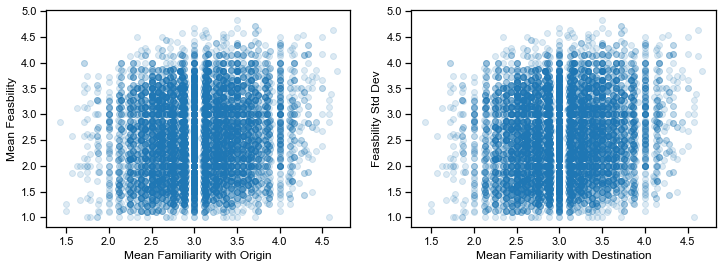

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

axs[0].scatter(transition_mean['familiarity_with_origin_1-5'], transition_mean['feasibility_1-5'], alpha=0.15)
axs[0].set_xlabel('Mean Familiarity with Origin')
axs[0].set_ylabel('Mean Feasbility')

axs[1].scatter(transition_mean['familiarity_with_origin_1-5'], transition_mean['feasibility_1-5'], alpha=0.15)
axs[1].set_xlabel('Mean Familiarity with Destination')
axs[1].set_ylabel('Feasbility Std Dev');

In [24]:
from skbio.diversity.alpha import shannon, simpson

In [25]:
transition_shannon = []

for col in ['feasibility_1-5', 'familiarity_with_origin_1-5', 'familiarity_with_destination_1-5']:
    shan = transition_mean = (batch_results.groupby(['origin_label', 'destination_label'])[col].apply(shannon))
    transition_shannon.append(shan)
    
transition_shannon = pd.concat(transition_shannon, axis=1)

In [26]:
transition_simpson = []

for col in ['feasibility_1-5', 'familiarity_with_origin_1-5', 'familiarity_with_destination_1-5']:
    shan = transition_mean = (batch_results.groupby(['origin_label', 'destination_label'])[col].apply(shannon))
    transition_shannon.append(shan)
    
transition_shannon = pd.concat(transition_shannon, axis=1)

TypeError: Expected tuple, got str

KeyError: 'familiarity_diff'

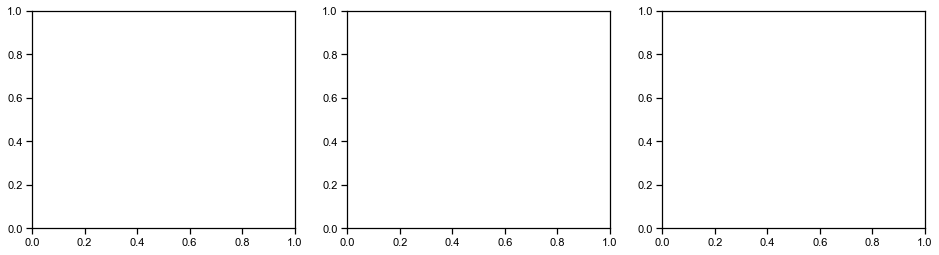

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 4))

axs[0].scatter(transition_mean['familiarity_diff'], transition_mean['feasibility_1-5'], alpha=0.15)
axs[0].set_xlabel('Mean Absolute Difference in Familiarity')
axs[0].set_ylabel('Mean Feasbility')

axs[1].scatter(transition_mean['familiarity_with_origin_1-5'], transition_std['feasibility_1-5'], alpha=0.15)
axs[1].set_xlabel('Mean Familiarity with Origin')
axs[1].set_ylabel('Feasbility Std Dev')

axs[2].scatter(transition_mean['familiarity_with_destination_1-5'], transition_std['feasibility_1-5'], alpha=0.15)
axs[2].set_xlabel('Mean Familiarity with Destination')
axs[2].set_ylabel('Feasbility Std Dev');

The difference in familiarity between origin and destination occupations seems to have a very limited negative correlation (-0.104) with the actual feasibility score. However, both very high and very low average feasibilities are recorded at all levels of familiarity difference. 

The familiarity of either the origin or destination does not lead to a wider dispersion in the feasibility rating.

Most contentious transitions:

In [28]:
transition_std.sort_values('feasibility_1-5', ascending=False).head(20)['feasibility_1-5']

origin_label                            destination_label             
sales assistant                         locker room attendant             2.000000
maternity support worker                radiographer                      1.902379
orthoptist                              occupational therapist            1.889822
physiotherapist                         podiatrist                        1.864454
funeral services director               funeral attendant                 1.864454
hospitality establishment receptionist  post office counter clerk         1.861899
academic support officer                higher education lecturer         1.861899
credit adviser                          economic policy officer           1.816590
tutor                                   circus arts teacher               1.812654
drafter                                 printed circuit board designer    1.812654
secondary school teaching assistant     lifeguard instructor              1.812654
advanced physiot

In [29]:
results_breakdown = (batch_results
                     .groupby(['origin_label', 'destination_label', 'feasibility_1-5'])['classification_id']
                     .count()
                     .unstack()
                     .fillna(0))
results_breakdown_norm = results_breakdown.div(results_breakdown.sum(axis=1), axis=0)

In [30]:
from sklearn.metrics import pairwise_distances

In [31]:
results_breakdown_norm_ = results_breakdown_norm.sample(200, random_state=0)

dists = pd.DataFrame(
    1 - pairwise_distances(results_breakdown_norm_, metric='euclidean'),
    index=results_breakdown_norm_.index,
    columns=results_breakdown_norm_.index
)

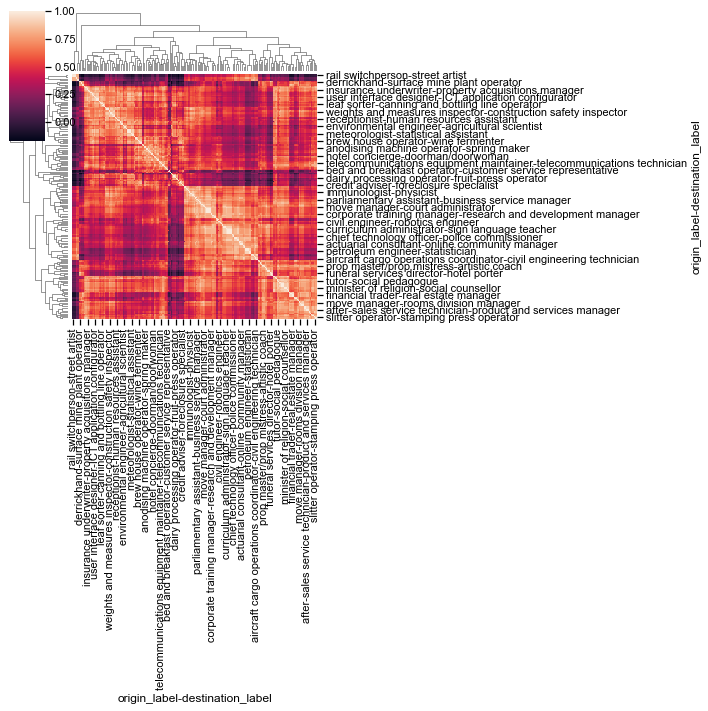

In [32]:
sns.clustermap(dists)

Clusters off the diagonal could indicate areas of disagreement.

We might want to threshold the level of uncertainty.

Do people who give different results also cite different reasons? (could see if there is a relationship between std dev of the feasibility and entropy of the reason choices)

What happens when you drop out the extremes?

In [33]:
x = (pd.get_dummies(
    batch_results['feasibility_1-5'])
 .groupby(batch_results['subject_ids'])
 .sum()
 .apply(shannon, axis=1))
y = batch_results.groupby('subject_ids')['feasibility_1-5'].mean()

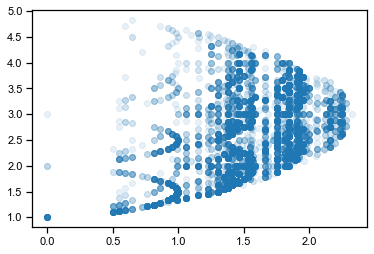

In [34]:
plt.scatter(x, y, alpha=0.1)

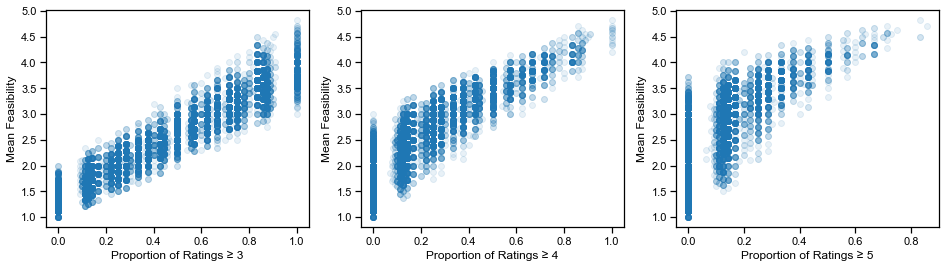

In [39]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 4))

for i, col in enumerate(['is_gt_2', 'is_gt_3', 'is_gt_4']):
    axs[i].scatter(transition_mean[col], transition_mean['feasibility_1-5'], alpha=0.1)
    axs[i].set_xlabel(f'Proportion of Ratings ≥ {int(col.split("_")[-1]) + 1}')
    axs[i].set_ylabel('Mean Feasibility')

In [40]:
((transition_mean['is_gt_2'] >= 0.2) & (transition_mean['feasibility_1-5'] < 2)).sum() / transition_mean.shape[0]

0.05267200702293427

In [41]:
((transition_mean['is_gt_3'] >= 0.4) & (transition_mean['feasibility_1-5'] < 3)).sum() / transition_mean.shape[0]

0.004938000658400088

In [42]:
((transition_mean['is_gt_4'] >= 0.4) & (transition_mean['feasibility_1-5'] < 3)).sum() / transition_mean.shape[0]

0.0

## 1.3 Check the 'coders'

In [43]:
# Number of unique coders
len(batch_results.coder_id.unique())

387

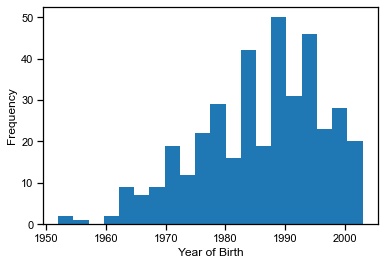

In [46]:
fig, ax = plt.subplots()
ax.hist(batch_results.drop_duplicates('coder_id').year_of_birth, bins=20)
ax.set_xlabel('Year of Birth')
ax.set_ylabel('Frequency');

In [47]:
coder_df = batch_results.groupby('coder_id').count()

In [48]:
# Gender distribution
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('gender').agg({'coder_id': 'count'})

,coder_id
gender,
Female,151
Male,234
Prefer not to say,1
Prefer to self-describe,1


In [49]:
# Qualification distribution
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('highest_qualification').agg({'coder_id': 'count'}).sort_values('coder_id')

,coder_id
highest_qualification,
Master'degree,8
Doctorate,9
Bachelor'degree,10
Higher National Certificate,20
Higher National Diploma,24
GCSE,30
A-Level,62
Master's degree,72
Bachelor's degree,152


In [50]:
# How many 'questionable' coders?
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('questionable_respondant_flag').agg({'coder_id': 'count'})

,coder_id
questionable_respondant_flag,
False,377
True,10


In [51]:
# Coder locations
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('nation').agg({'coder_id': 'count'})

,coder_id
nation,
England,334
Northern Ireland,3
Scotland,31
Wales,19


### 1.3.1 Check the activity of each coder

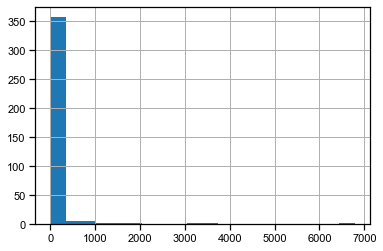

In [52]:
# Number of assessments by a coder
coder_counts = batch_results.groupby('coder_id').agg({'classification_id': 'count'})
coder_counts.classification_id.hist(bins=20)
plt.show()

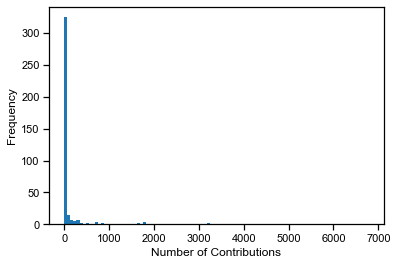

In [53]:
fig, ax = plt.subplots()
ax.hist(coder_counts['classification_id'], bins=100)
ax.set_xlabel('Number of Contributions')
ax.set_ylabel('Frequency');

Note the fat tail of the distribution - we should be aware of the outsized influence of 'super-users'.

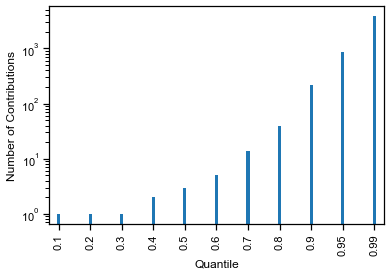

In [54]:
fig, ax = plt.subplots()
(coder_counts
 .quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
 .plot.bar(width=0.1, legend=None, ax=ax))
ax.set_yscale('log')
ax.set_xlabel('Quantile')
ax.set_ylabel('Number of Contributions');

Only 30% of coders made more than 10 contributions, while 50% made 3 or less.

How many high count coders can we drop out while still maintaining integrity of the results?

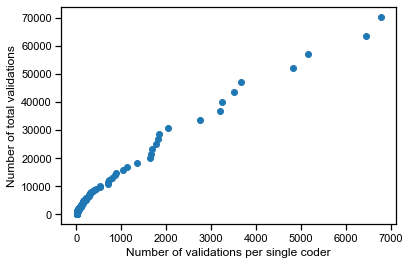

In [55]:
# Note: 50% of the total number of validations are provided by about 10 people 

# Plot an empirical cumulative distribution
x = np.sort(coder_counts.classification_id.to_list())
y = np.cumsum(x)
plt.scatter(x, y, linewidths=1)
plt.ylabel('Number of total validations')
plt.xlabel('Number of validations per single coder')
plt.show()

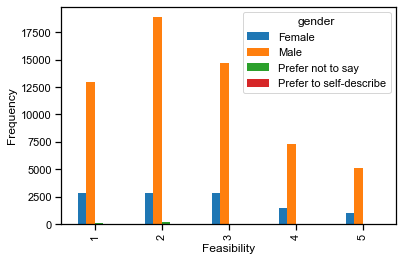

In [56]:
fig, ax = plt.subplots()

batch_results.groupby('gender')['feasibility_1-5'].value_counts().unstack(0).plot.bar(ax=ax)

ax.set_xlabel('Feasibility')
ax.set_ylabel('Frequency');

Women seem to award a higher fraction of the most pessimistic answer but also the most optimistic.

In [57]:
low_count_coder_ids = coder_counts[coder_counts['classification_id'] < 100].index.values

low_count_batch_results = batch_results.set_index('coder_id').loc[low_count_coder_ids].reset_index()

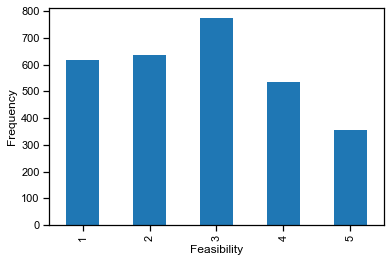

In [58]:
fig, ax = plt.subplots()

low_count_batch_results.groupby('feasibility_1-5').agg({'classification_id': 'count'}).plot.bar(ax=ax, legend=False)
ax.set_xlabel('Feasibility')
ax.set_ylabel('Frequency');

Removing the high responders.

Do contributor's average ratings change over time as they become 'sensitised' to the careers or are they self consistent across time?

## 1.4 Reasons for ratings

In [59]:
batch_results['reasons'] = batch_results['Reasons'].str.extract(r'.*?\*\*(.*)\*\*.*')
batch_results['reasons'] = batch_results['reasons'].str.lower().str.replace(' ', '_')
batch_results = batch_results.drop('Reasons', axis=1)

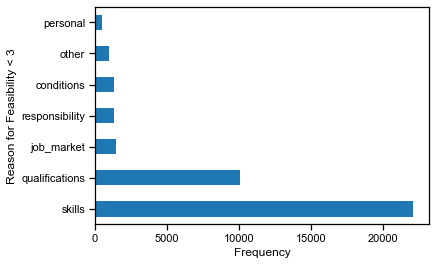

In [60]:
fig, ax = plt.subplots()
batch_results[batch_results['feasibility_1-5'] < 3]['reasons'].value_counts().plot.barh(ax=ax)
ax.set_xlabel('Frequency')
ax.set_ylabel('Reason for Feasibility < 3');

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
transition_reasons = (batch_results.groupby(['origin_label', 'destination_label'])['reasons']
                      .apply(lambda x: ' '.join(list(x))))

cv = CountVectorizer()
cv.fit(transition_reasons)
reason_counts = pd.DataFrame(cv.transform(transition_reasons).todense(), columns=cv.get_feature_names())
reason_share = reason_counts.divide(reason_counts.sum(axis=1), axis=0)

reason_share.index = transition_reasons.index

In [63]:
reason_share = reason_share.join(
    batch_results
    .groupby(['origin_label', 'destination_label'])
    ['feasibility_1-5'].mean()
)

In [64]:
for skill in batch_results['reasons'].value_counts().index:
    df = reason_share[reason_share['feasibility_1-5'] <= 2]
    df['inv_f'] = 5 - df['feasibility_1-5']
    df = df.sort_values([skill, 'inv_f'], ascending=False).head(10)
    print(skill.replace('_', ' ').title())
    [print('-', ' ==> '.join(_)) for _ in df.index.to_list()]
    print('')

Skills
- economic policy officer ==> fisheries master
- rigger ==> cosmetics production machine operator
- textile product developer ==> promoter
- ATM repair technician ==> stringed musical instrument maker
- hand brick moulder ==> auctioneer
- security guard ==> sauce production operator
- urban planner ==> bee breeder
- poultry sexer ==> product assembly inspector
- fisheries assistant engineer ==> movie distributor
- surface miner ==> proofreader

Qualifications
- user interface developer ==> architect
- relocation officer ==> lawyer
- food analyst ==> materials engineer
- insurance risk consultant ==> meteorologist
- orthoptist ==> pharmacist
- pipeline route manager ==> materials engineer
- orthoptist ==> specialist chiropractor
- corporate training manager ==> secondary school teacher
- optometrist ==> podiatrist
- optometrist ==> speech and language therapist

Other
- animation layout artist ==> dramaturge
- insurance agency manager ==> provincial governor
- actuarial consultan

/Users/grichardson/miniconda3/envs/mapping_career_causeways/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 1.5 Coder Backgrounds

In [114]:
from sklearn.preprocessing import MultiLabelBinarizer
from ast import literal_eval

In [115]:
batch_results['background'] = batch_results['background'].apply(literal_eval)

In [116]:
mlb = MultiLabelBinarizer()
mlb.fit(batch_results['background'])

background_df = pd.DataFrame(mlb.transform(batch_results['background']), index=batch_results.index, columns=mlb.classes_)

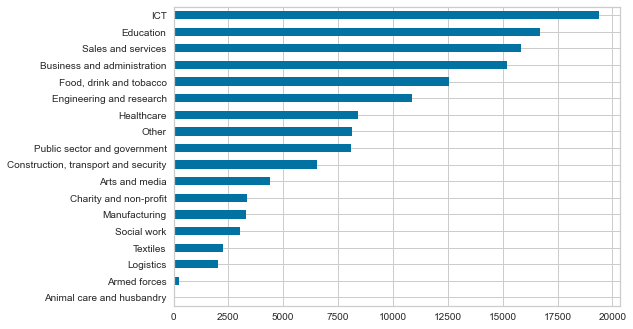

In [120]:
background_df.sum().sort_values().plot.barh()

# 2. Check the coverage of transitions

See if all of the transitions provided by us have been tested by the validators

In [68]:
# Check that the # of transitions match
assert(len(batch) == len(batch_results.subject_ids.unique()))

In [69]:
# Check if any transitions are missing
df = batch.merge(batch_results[['origin_id', 'destination_id', 'subject_ids']],
                 on=['origin_id', 'destination_id'])
df[df.subject_ids.isnull()]

,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,unmatched_skills,subject_ids


In [70]:
df.sample()

,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,unmatched_skills,subject_ids
24329,1717,move manager,Move managers coordinate all the resources and...,192,real estate manager,Real estate managers handle and oversee the op...,maintain financial records,manage personnel; control financial resources;...,financial statements; trace financial transact...,52685580


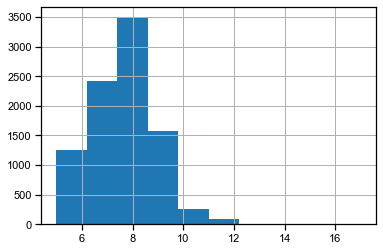

In [71]:
# Note: There are at least 5 ratings for each transition
transition_counts = batch_results.groupby('subject_ids').count()
transition_counts.classification_id.hist()
plt.show()

In [72]:
transition_counts.classification_id.min()

5

# 3. Check the correlation between feasibility and similarity measures

In [73]:
def get_similarities(df, W, col_name = 'similarity'):
    """ Find similarity values in matrix W, for transitions specified in dataframe df """
    sim_list = []
    for j, row in df.iterrows():
        sim = W[int(row.origin_id), int(row.destination_id)]
        sim_list.append(sim)
    df[col_name] = sim_list 
    return df


In [75]:
# Check the mean feasibility for each transition
batch_results_agg = (batch_results
                     .groupby('subject_ids')
                     .agg({'feasibility_1-5': 'mean'})
                     .reset_index())

# Add occupation IDs 
batch_results_agg = batch_results_agg.merge(batch_results.drop_duplicates('subject_ids')[[
    'origin_id', 'destination_id',
    'origin_label', 'destination_label',
    'subject_ids']], on=['subject_ids'], how='left')

batch_results_agg.sample(5)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label
521,52452659,2.333333,555,55,academic support officer,primary school teacher
8976,53142566,3.833333,1290,1094,office clerk,secretary
1409,52684506,1.500000,1426,2252,orthoptist,specialist chiropractor
640,52682408,1.857143,615,1889,credit manager,product manager
3052,53136014,3.000000,160,1419,ICT security consultant,ICT auditor manager


/Users/grichardson/miniconda3/envs/mapping_career_causeways/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



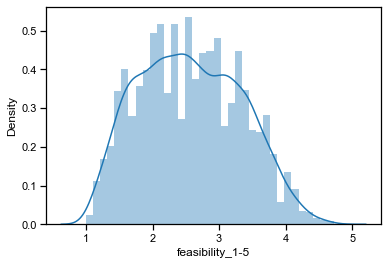

In [76]:
sns.distplot(batch_results_agg['feasibility_1-5'])
plt.show()

In [77]:
# Add similarity values to the table
df = get_similarities(batch_results_agg, sims.W_combined, col_name = 'similarity_combined')
df = get_similarities(df, sims.W_essential, col_name = 'similarity_essential_skills')
df = get_similarities(df, sims.W_all_to_essential, col_name = 'similarity_optional_skills')
df = get_similarities(df, sims.W_activities, col_name = 'similarity_activities')
df = get_similarities(df, sims.W_work_context, col_name = 'similarity_work_context')

### 3.1 Combined similarity measure

Pearson correlation: (0.6964873742301811, 0.0)
Spearman correlation: SpearmanrResult(correlation=0.7063937609987885, pvalue=0.0)


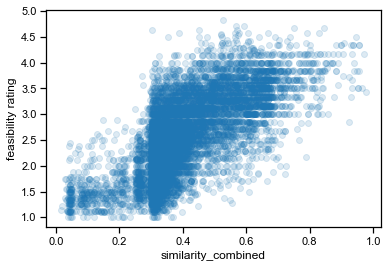

In [78]:
def plot_scatter(df=df, x='similarity', y='feasibility_1-5'):
    plt.scatter(
        x=df[x],
        y=df[y],
        alpha=0.15)
    plt.xlabel(x)
    plt.ylabel('feasibility rating')
    print(f'Pearson correlation: {pearsonr(df[x], df[y])}')
    print(f'Spearman correlation: {spearmanr(df[x], df[y])}')
    
plot_scatter(x='similarity_combined', y='feasibility_1-5')
plt.show()

In [79]:
# Check the least feasible transitions
# (definitely some odd ones there)
df.sort_values('feasibility_1-5').head(10)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity_combined,similarity_essential_skills,similarity_optional_skills,similarity_activities,similarity_work_context
2944,53135906,1.0,29,2867,legal guardian,recreational therapist,0.370220,2.039885e-01,2.039885e-01,3.409745e-01,0.731929
4903,53137865,1.0,1611,2517,roustabout,digital games designer,0.049317,5.839378e-05,5.855384e-05,4.440892e-16,0.197150
1550,52684850,1.0,1510,868,composer,lexicographer,0.319922,4.580137e-07,4.852017e-07,5.492440e-01,0.730445
5297,53138259,1.0,733,1857,vehicle rental agent,geographic information systems specialist,0.234958,2.119138e-04,5.384992e-04,3.419322e-01,0.597150
5231,53138193,1.0,506,1843,carpenter,aircraft pilot,0.206879,2.009773e-04,1.352152e-03,2.398687e-01,0.586095
5057,53138019,1.0,557,1934,boatswain,advanced physiotherapist,0.120557,4.908830e-04,5.061102e-04,7.801290e-02,0.403220
2621,52690178,1.0,2638,2880,asset manager,natural resources consultant,0.308654,2.037628e-04,2.358368e-04,4.896805e-01,0.744496
597,52682320,1.0,600,2076,security guard,aviation inspector,0.308610,1.716675e-03,1.838664e-03,5.351250e-01,0.695761
5010,53137972,1.0,1790,141,user interface designer,animal therapist,0.099228,1.222089e-04,1.227670e-04,6.166257e-02,0.335005
4823,53137785,1.0,811,774,glass polisher,mediator,0.036712,6.249365e-06,1.888366e-05,1.332012e-02,0.133503


In [80]:
# Check the least feasible transitions
# (definitely some odd ones there)
df.sort_values('feasibility_1-5').tail(10)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity_combined,similarity_essential_skills,similarity_optional_skills,similarity_activities,similarity_work_context
3557,53136519,4.571429,1002,2150,industrial engineer,process engineer,0.605071,0.520020,0.837764,0.195981,0.866520
8685,53142275,4.571429,1128,1642,toymaker,doll maker,0.669089,0.537911,0.770823,0.367623,1.000000
1175,52683772,4.625000,1196,2065,data entry clerk,data entry supervisor,0.450667,0.249218,0.568865,0.296492,0.688094
146,52451592,4.625000,139,573,shop assistant,bartender,0.302900,0.104503,0.196803,0.266477,0.643816
7886,53141476,4.625000,2151,1518,motorcycle delivery person,postman/postwoman,0.570813,0.624065,0.691089,0.414659,0.553440
8954,53142544,4.666667,867,2902,bindery operator,paperboard products assembler,0.750683,0.609534,0.998499,0.667971,0.726730
9071,53142661,4.666667,374,138,animal handler,animal care attendant,0.846336,0.842657,0.917541,0.918486,0.706660
7849,53141439,4.714286,2674,1062,hotel butler,steward/stewardess,0.566671,0.665701,0.665705,0.365661,0.569617
8053,53141643,4.714286,2842,2634,kitchen porter,kitchen assistant,0.591632,0.527297,0.631051,0.522001,0.686179
2460,52689775,4.833333,2490,2827,human resources officer,human resources manager,0.525282,0.270378,0.652685,0.356846,0.821218


### 3.2 Essential skills similarity measure

Pearson correlation: (0.6764875698562529, 0.0)
Spearman correlation: SpearmanrResult(correlation=0.6992837855685615, pvalue=0.0)


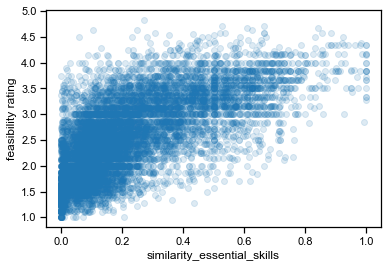

In [81]:
plot_scatter(x='similarity_essential_skills', y='feasibility_1-5')
plt.show()

### 3.3 Optional skills similarity measure

Note: Optional skills similarity measures the similarity between all ('essential' and 'optional') skills at the origin occupation, and the 'essential' skills at the destination occupation.

Pearson correlation: (0.7578059352967147, 0.0)
Spearman correlation: SpearmanrResult(correlation=0.7734076215956829, pvalue=0.0)


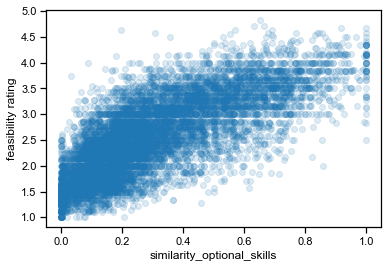

In [82]:
plot_scatter(x='similarity_optional_skills', y='feasibility_1-5')
plt.show()

### 3.4 Work activity similarity measure

Pearson correlation: (0.3304338086140815, 4.533049060830223e-231)
Spearman correlation: SpearmanrResult(correlation=0.3029453013080132, pvalue=9.743575640118783e-193)


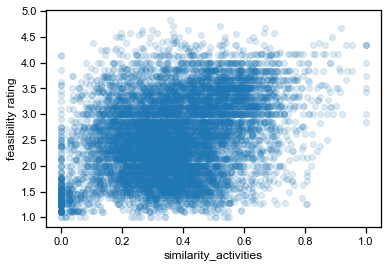

In [83]:
plot_scatter(x='similarity_activities', y='feasibility_1-5')

### 3.5 Work context similarity measure

Pearson correlation: (0.24324393753240436, 7.420690962834337e-123)
Spearman correlation: SpearmanrResult(correlation=0.14423999270165022, pvalue=1.4624209910547692e-43)


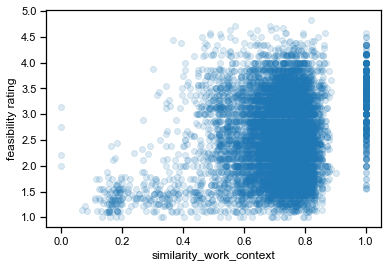

In [84]:
plot_scatter(x='similarity_work_context', y='feasibility_1-5')

### 3.6 Similarity Scores and Disagreement

In [97]:
df = df.set_index('subject_ids')
df = df.merge(batch_results.groupby('subject_ids')['feasibility_1-5'].std(),
              left_index=True, right_index=True)


In [98]:
df = df.rename(columns={'feasibility_1-5_x': 'feasibility_mean', 'feasibility_1-5_y': 'feasibility_std'})

## 4. Model

Model to predict transition feasibility:

- Create a binary vector of skill pairs to represent each job and train a regression model to predict feasibility
- Create a model of averaged origin and destination skill embeddings and train a regression model to predict feasibility
- Combination of similarity measures that we already have

New features

- Specialisation of skills (overall and adjusted overlap)

### 4.1 Simple Model - Linear Regression on Similarity Scores

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from yellowbrick.regressor import ResidualsPlot

In [101]:
train_cols = ['similarity_essential_skills', 'similarity_optional_skills', 'similarity_activities', 'similarity_work_context']
test_col = 'feasibility_mean'

X_train, X_test, y_train, y_test = train_test_split(df[train_cols], df[test_col], random_state=0, test_size=0.2, train_size=0.8)

In [102]:
polynomial_features = PolynomialFeatures(degree=2)
regression = LinearRegression()
pipeline = Pipeline([
    ("polynomial_features", polynomial_features),
     ("regression", regression)])

In [103]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# The coefficients
print('Coefficients: \n', pipeline['regression'].coef_, '\n')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.         -0.52733524  4.92554933  0.28301375 -0.41067824 -2.8249002
  3.75605775 -0.19778286  0.87155751 -2.81238333 -0.64926257 -1.0754308
 -0.21252872  0.1963655   0.56507237] 

Mean squared error: 0.23
Coefficient of determination: 0.61


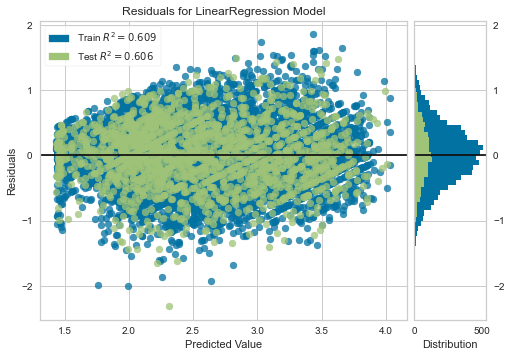

In [104]:
visualizer = ResidualsPlot(pipeline)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [105]:
from sklearn.svm import SVR

In [106]:
svr = SVR(kernel='rbf', C=.1, gamma='auto', epsilon=0.5)

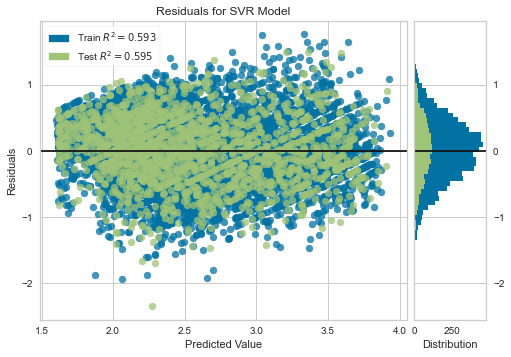

In [107]:
visualizer = ResidualsPlot(svr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [123]:
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.24
Coefficient of determination: 0.59


# Other Thoughts

Do we need another measure of skills similarity - where skills are structurally or semantically similar in the web of skills?